In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train_data = pd.read_csv('processed_stroke_data_train.csv')

# Separate features and target
X = train_data.drop(columns=['stroke'])
y = train_data['stroke']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<font color="bluegrey" size=+1.0><b>Logistic Regression</b></font>

In [6]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_log = log_reg.predict(X_test)
y_pred_prob_log = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_log)}")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       780
           1       0.00      0.00      0.00        38

    accuracy                           0.95       818
   macro avg       0.48      0.50      0.49       818
weighted avg       0.91      0.95      0.93       818

Accuracy: 0.9535452322738386
ROC AUC Score: 0.820782726045884


c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

<font color="bluegrey" size=+1.0><b>Decision Tree</b></font>

In [7]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_dt)}")

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       780
           1       0.25      0.03      0.05        38

    accuracy                           0.95       818
   macro avg       0.60      0.51      0.51       818
weighted avg       0.92      0.95      0.93       818

Accuracy: 0.9511002444987775
ROC AUC Score: 0.7122807017543861


<font color="bluegrey" size=+1.0><b>Visualisation</b></font>

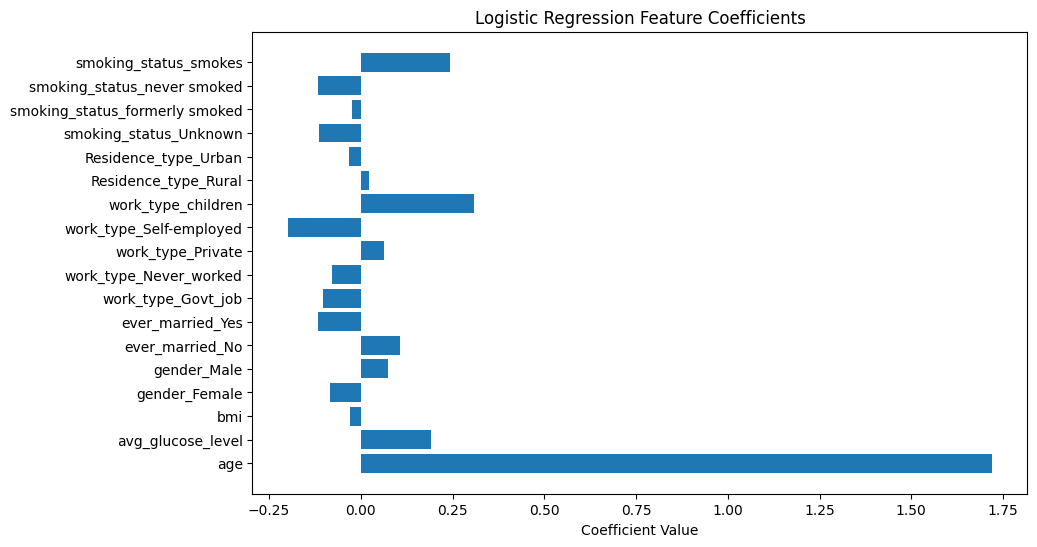

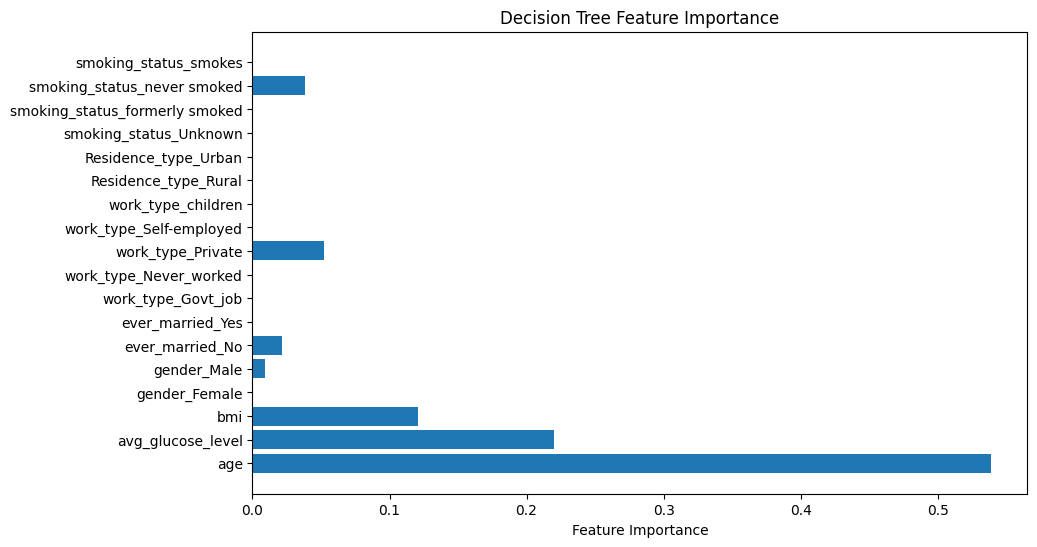

In [8]:
# Coefficients for Logistic regression
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, log_reg.coef_[0])  
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Feature Coefficients")
plt.show()

# Feature Importance for Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, dt_model.feature_importances_)  
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

<font color="bluegrey" size=+1.0><b>Save results</b></font>

In [9]:
# Store results in a dict
results = {
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_dt)],
    "ROC AUC": [roc_auc_score(y_test, y_pred_prob_log), roc_auc_score(y_test, y_pred_prob_dt)]
}

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results)

print(results_df)

                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.953545  0.820783
1        Decision Tree  0.951100  0.712281


<font color="bluegrey" size=+1.0><b>Save models</b></font>

In [12]:
from joblib import dump

dump(log_reg, 'logistic_regression_model.pkl')
dump(dt_model, 'decision_tree_model.pkl')
print("Successfully saved baseline models.")

Successfully saved baseline models.
